# EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
 # replace with your path
%cd /content/drive/MyDrive/projects/paris-traffic-forecast

!pip install -q darts

/content/drive/MyDrive/projects/paris-traffic-forecast
     |████████████████████████████████| 290 kB 8.4 MB/s 
     |████████████████████████████████| 9.8 MB 51.9 MB/s 
     |████████████████████████████████| 11.2 MB 49.8 MB/s 
     |████████████████████████████████| 1.4 MB 25.3 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 791 kB 36.8 MB/s 
     |████████████████████████████████| 177 kB 78.8 MB/s 
     |████████████████████████████████| 155 kB 69.3 MB/s 
     |████████████████████████████████| 374 kB 41.8 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 216 kB 53.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.23 which is incompatible.
google-colab 1.0.

## load data

In [68]:
import pandas as pd
path_to_data = 'data/AV-champs-elysees.csv'
df = pd.read_csv(path_to_data, sep=';')
df

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2021-10-13T23:00:00+02:00,843.0,16.57111,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
1,4264,AV_Champs_Elysees,2021-10-13T20:00:00+02:00,1337.0,26.49722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2,4264,AV_Champs_Elysees,2021-10-13T19:00:00+02:00,1222.0,24.47278,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
3,4264,AV_Champs_Elysees,2021-10-13T18:00:00+02:00,1096.0,21.29500,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
4,4264,AV_Champs_Elysees,2020-12-16T10:00:00+01:00,1472.0,17.73000,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,4264,AV_Champs_Elysees,2021-11-01T03:00:00+01:00,1224.0,41.50611,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
9229,4264,AV_Champs_Elysees,2021-08-01T03:00:00+02:00,1108.0,26.04167,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
9230,4264,AV_Champs_Elysees,2021-08-01T02:00:00+02:00,1137.0,27.89167,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
9231,4264,AV_Champs_Elysees,2021-08-01T04:00:00+02:00,866.0,25.61333,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [70]:
# set datetime index
time_col = "Date et heure de comptage"
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], utc=True)
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df.head(3)

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
Date et heure de comptage,,,,,,,,,,,,,,
2021-10-13 21:00:00+00:00,4264,AV_Champs_Elysees,843.0,16.57111,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-10-13 18:00:00+00:00,4264,AV_Champs_Elysees,1337.0,26.49722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-10-13 17:00:00+00:00,4264,AV_Champs_Elysees,1222.0,24.47278,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [72]:
from darts import TimeSeries
df = df.drop(columns=['Libelle'], errors='ignore')
ts = TimeSeries.from_dataframe(df, 
                          value_cols=["Débit horaire", "Taux d'occupation"],
                          fill_missing_dates=True,
                          freq='H')
ts

<TimeSeries (DataArray) (Date et heure de comptage: 9477, component: 2, sample: 1)>
array([[[3.400000e+01],
        [4.011100e-01]],

       [[4.000000e+01],
        [4.838900e-01]],

       [[6.600000e+01],
        [7.505600e-01]],

       ...,

       [[1.154000e+03],
        [1.712945e+01]],

       [[1.049000e+03],
        [1.632389e+01]],

       [[9.650000e+02],
        [1.315167e+01]]])
Coordinates:
  * Date et heure de comptage  (Date et heure de comptage) object 16041996000...
  * component                  (component) object 'Débit horaire' "Taux d'occ...
Dimensions without coordinates: sample

In [82]:
ts.univariate_component(0)

<TimeSeries (DataArray) (Date et heure de comptage: 9477, component: 1, sample: 1)>
array([[[  34.]],

       [[  40.]],

       [[  66.]],

       ...,

       [[1154.]],

       [[1049.]],

       [[ 965.]]])
Coordinates:
  * Date et heure de comptage  (Date et heure de comptage) object 16041996000...
  * component                  (component) <U13 'Débit horaire'
Dimensions without coordinates: sample

TypeError: ignored

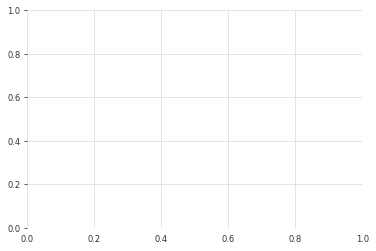

In [76]:
ts.plot()